In [13]:
import matplotlib
import  pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
%matplotlib inline

In [14]:
regexp_stat = re.compile(r'analizo_(.)*_(mean|sum|quantile_max)')
regexp_total = re.compile(r'analizo_total_(.)*')
rep_df_2d = pd.read_csv('data/2d-03_10_2018.csv')
#rep_df_3d = pd.read_csv('data/3D-analysis-16_09_2018.csv')
#rep_df = pd.concat([rep_df_2d,rep_df_3d],sort=False)
code_df = rep_df_2d[rep_df_2d['is_source']==True]

In [15]:
code_df = code_df.rename(index=str,columns={'new_dir':'folder'})

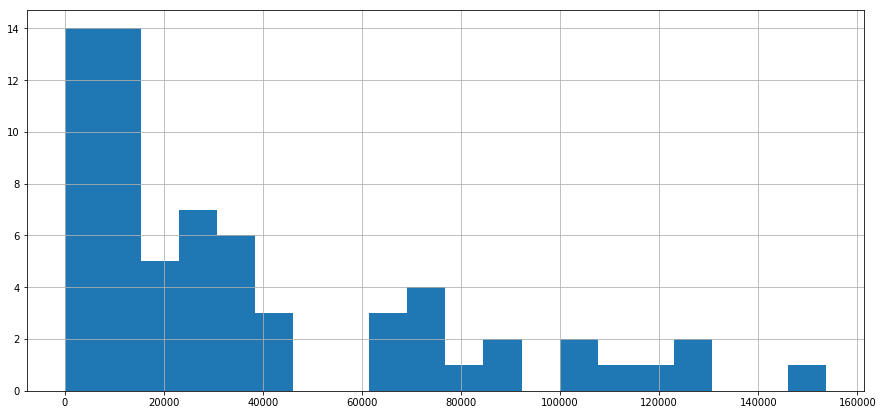

In [16]:
rep_df_2d['analizo_total_loc'].hist(bins=20,figsize=(15,7))

In [17]:
code_df.groupby('year').mean()['analizo_accm_mean']

year
1996    9.988174
1997    5.027972
1998    3.950740
1999    3.326786
2000    3.128452
2001    2.314977
2002    3.087016
2004    3.060405
2007    1.964022
2008    2.384010
2009    4.715995
2011    2.752235
2012    3.808741
2014    2.338487
2016    3.499603
Name: analizo_accm_mean, dtype: float64

In [20]:
code_df[['analizo_amloc_mean','analizo_accm_mean','analizo_mmloc_mean']].corr().to_csv('corr.csv')

In [ ]:
sns.pairplot(code_df[['McCabes_cyclomatic_complexity_per_module','analizo_total_loc','analizo_accm_mean','analizo_total_modules','analizo_accm_sum']].dropna())

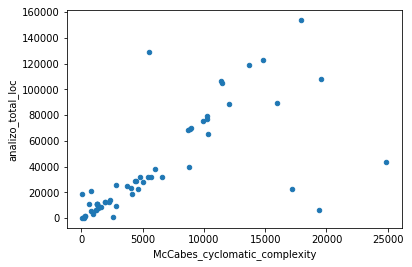

In [14]:
code_df.plot.scatter(x = 'McCabes_cyclomatic_complexity', y='analizo_total_loc')


In [31]:
code_df_reduced = code_df[[c for c in code_df.columns if regexp_stat.search(c) or regexp_total.search(c) or c == 'folder']].copy()
code_df_reduced['type'] = 'robo'
code_df_reduced['type_original'] = 'robo'

In [32]:
code_df_reduced.dropna(inplace=True)

In [50]:
df1 = pd.read_csv(os.getcwd() +"/data/git-hub-04_10_2018code_analysis__summery_report.csv")
df2 = pd.read_csv(os.getcwd() +"/data/anac-04_10_2018code_analysis__summery_report.csv")
df2['type'] = 'anac'
df_all = pd.concat([df1, df2])

In [51]:
GH_df = df_all[[c for c in df_all.columns if regexp_stat.search(c) or regexp_total.search(c) or c in ['folder','type']]].copy()
GH_df.rename(columns={'type':'type_original'},inplace=True)
GH_df['type'] = 'others'

In [52]:
GH_df_group_by = GH_df.groupby('type_original').count()

In [53]:
GH_df_group_by_50 = GH_df_group_by[GH_df_group_by.folder>10]

In [54]:
GH_df = GH_df[GH_df['type_original'].isin(GH_df_group_by_50.index.values)]

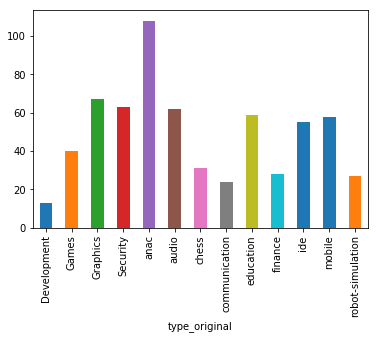

In [55]:
GH_df.groupby('type_original').count()['folder'].plot(kind='bar')

In [ ]:
low = .01
high = .97
quant_df = GH_df['analizo_accm_mean'].quantile([low, high])
quant_df

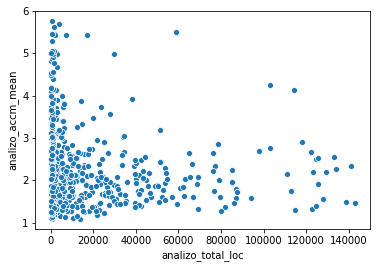

In [57]:
GH_df_reduced =GH_df.loc[(GH_df['analizo_accm_mean']>=quant_df[low]) & (GH_df['analizo_accm_mean']<=quant_df[high]),:]
sns.scatterplot(data=GH_df_reduced[(GH_df_reduced['analizo_total_loc']<150000) & (GH_df_reduced['analizo_total_loc']>-150000)], y='analizo_accm_mean',x='analizo_total_loc')

In [58]:
df_merged= pd.concat([code_df_reduced,GH_df_reduced],sort=False)

In [59]:
df_merged.fillna(0,inplace=True)

In [60]:
df_merged.groupby(['type']).count()

,analizo_acc_mean,analizo_acc_quantile_max,analizo_acc_sum,analizo_accm_mean,analizo_accm_quantile_max,analizo_accm_sum,analizo_amloc_mean,analizo_amloc_quantile_max,analizo_amloc_sum,analizo_anpm_mean,...,analizo_total_cof,analizo_total_eloc,analizo_total_loc,analizo_total_methods_per_abstract_class,analizo_total_modules,analizo_total_modules_with_defined_attributes,analizo_total_modules_with_defined_methods,analizo_total_nom,folder,type_original
type,,,,,,,,,,,,,,,,,,,,,
others,599,599,599,599,599,599,599,599,599,599,...,599,599,599,599,599,599,599,599,599,599
robo,65,65,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65


In [61]:
float(38)/(198+38)*100

16.101694915254235

In [1]:
fix,ax = plt.subplots(figsize=(15,10))
g = sns.boxplot(x='type_original',y='analizo_accm_mean',data=df_merged, set_yscale(0,12))
g = sns.swarmplot(x='type_original',y='analizo_accm_mean',data=df_merged,color='black')
for item in g.get_xticklabels():
     item.set_rotation(90)

SyntaxError: non-keyword arg after keyword arg (<ipython-input-1-33fd4c5ebd03>, line 2)

In [214]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


In [215]:
X = df_merged.select_dtypes(include=[np.number])
Y = df_merged.loc[:,'type']

In [216]:
# feature extraction
model = RandomForestClassifier()

In [217]:
rfe = RFE(model, 4)
fit = rfe.fit(X, Y)
X.columns[fit.support_]

Index([u'analizo_accm_mean', u'analizo_amloc_mean', u'analizo_cbo_mean',
       u'analizo_loc_mean'],
      dtype='object')

In [218]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=0)
fitl= model.fit(X,Y)
model.score(X_test,Y_test)
X.columns[np.flip(np.argsort(model.feature_importances_),0)]

Index([u'analizo_loc_mean', u'analizo_accm_mean', u'analizo_mmloc_mean',
       u'analizo_acc_mean', u'analizo_npm_quantile_max', u'analizo_anpm_mean',
       u'analizo_amloc_mean', u'analizo_nom_quantile_max',
       u'analizo_total_cof', u'analizo_loc_quantile_max', u'analizo_noa_sum',
       u'analizo_npa_quantile_max', u'analizo_sc_mean',
       u'analizo_dit_quantile_max', u'analizo_noa_mean',
       u'analizo_lcom4_quantile_max', u'analizo_total_loc',
       u'analizo_sc_quantile_max', u'analizo_lcom4_mean',
       u'analizo_noa_quantile_max',
       u'analizo_total_methods_per_abstract_class', u'analizo_lcom4_sum',
       u'analizo_cbo_sum', u'analizo_rfc_mean', u'analizo_loc_sum',
       u'analizo_noc_mean', u'analizo_mmloc_quantile_max',
       u'analizo_accm_quantile_max', u'analizo_dit_mean', u'analizo_rfc_sum',
       u'analizo_total_modules', u'analizo_cbo_quantile_max',
       u'analizo_rfc_quantile_max', u'analizo_cbo_mean', u'analizo_mmloc_sum',
       u'analizo_anpm_qu

In [219]:
pred = model.predict(X) 

In [220]:
def set_wrong_type(pred,Y,df,type_class):
    df.loc[:,'wrong'] = False
    df.loc[(pred != Y),'wrong'] = True
    df.loc[(pred != Y) & (df['type'] == type_class),'type_wrong'] = 'wrong_' +type_class    
    df.loc[(pred == Y) & (df['type'] == type_class),'type_wrong'] = type_class
    df.loc[(pred != Y) & (df['type'] == 'others'),'type_wrong'] = 'wrong_others'
    df.loc[(pred == Y) & (df['type'] == 'others'),'type_wrong'] = 'others'
    return df
df_merged = set_wrong_type(pred,Y,df_merged,'robo')

In [221]:
df_merged_acc = df_merged.groupby('type_wrong').count()['analizo_acc_mean']
df_merged_acc

type_wrong
others        440
robo           68
wrong_robo      2
Name: analizo_acc_mean, dtype: int64

# Accurercy : 

In [222]:
import collections
pred_robo_cont = collections.Counter(pred)['robo']
Y_robo_cont = collections.Counter(Y)['robo']

In [223]:
prec = float(df_merged_acc.loc['robo']) / pred_robo_cont
recall = float(df_merged_acc.loc['robo']) / Y_robo_cont
'prec : '  , prec , 'recall :'  , recall , 'f1 :' , (2*(prec*recall)/(prec+recall))

('prec : ', 1.0, 'recall :', 0.9714285714285714, 'f1 :', 0.9855072463768115)

pd.set_option('max_colwidth', 800)

df_merged[df_merged['wrong']==True][['analizo_accm_mean','analizo_dit_mean','type_wrong','type','folder']]

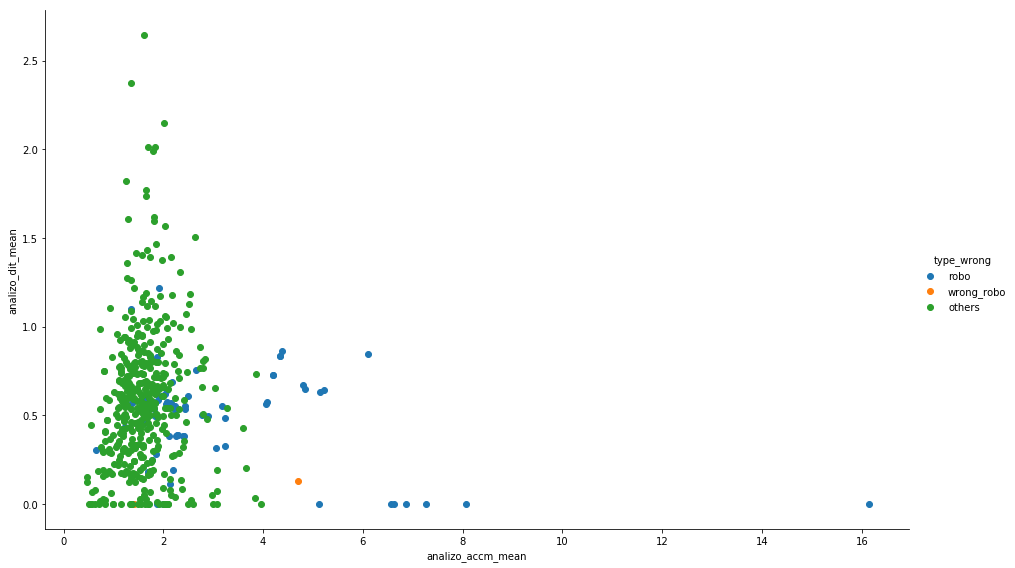

In [224]:
fg = sns.FacetGrid(data=df_merged, hue='type_wrong',  aspect=1.61,height=8)
fg.map(plt.scatter, 'analizo_accm_mean','analizo_dit_mean',).add_legend()

In [225]:
import pickle

In [226]:
pickle.dump(model,open('dump','w'))

In [227]:
type_class =  'robot-simulation'
GH_df_reduced.loc[GH_df_reduced['type_original']==type_class,'type' ] = type_class

In [228]:
GH_df_reduced.groupby('type').count()

,analizo_npa_quantile_max,analizo_mmloc_sum,folder,analizo_lcom4_quantile_max,analizo_rfc_sum,analizo_dit_sum,analizo_dit_mean,analizo_nom_sum,analizo_noc_mean,analizo_cbo_mean,...,analizo_noc_sum,analizo_sc_quantile_max,analizo_amloc_mean,analizo_acc_mean,analizo_amloc_sum,analizo_total_loc,analizo_cbo_quantile_max,analizo_total_nom,analizo_rfc_mean,analizo_total_eloc
type,,,,,,,,,,,,,,,,,,,,,
others,416,416,416,416,416,416,416,416,416,416,...,416,416,416,416,416,416,416,416,416,416
robot-simulation,24,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24


In [229]:
X = GH_df_reduced.select_dtypes(include=[np.number])

In [230]:
Y = GH_df_reduced.loc[:,'type']
# feature extraction
model = RandomForestClassifier()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
fitl= model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9204545454545454

In [231]:
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)
print("Num Features: %d") % fit.n_features_
print("Selected Features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_
X.columns[fit.support_]

Num Features: 3
Selected Features: [False False False False False False False False False False False False
 False False False False False  True False False False  True False False
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False]
Feature Ranking: [34 33 37  4 49  7 42  5 26 11 36 20 18 39 46 22 55  1 32 24 48  1 51 29
  1 13  6 47 53 25 31 19  9 52 10 27 40  3 15 28 54 44 43 23 45 41  2 30
 21 12 17 38 35 50 16 14  8]


Index([u'analizo_noa_mean', u'analizo_anpm_mean', u'analizo_mmloc_mean'], dtype='object')

In [232]:
pred = model.predict(X)

In [233]:
GH_df_reduced_type = set_wrong_type(pred,Y,GH_df_reduced,'Security')
GH_df_reduced_type_acc = GH_df_reduced_type.groupby('type_wrong').count()['analizo_npa_quantile_max']
GH_df_reduced_type_acc

type_wrong
others    416
Name: analizo_npa_quantile_max, dtype: int64

In [234]:
prec = float(GH_df_reduced_type_acc.loc['Security']) / (GH_df_reduced_type_acc.loc['wrong_others'] + GH_df_reduced_type_acc.loc['Security'])
recall = float(GH_df_reduced_type_acc.loc['Security']) / (GH_df_reduced_type_acc.loc['wrong_Security'] + GH_df_reduced_type_acc.loc['Security'])
'prec : '  , prec , 'recall :'  , recall , 'f1 :' , (2*(prec*recall)/(prec+recall))

KeyError: u'the label [Security] is not in the [index]'

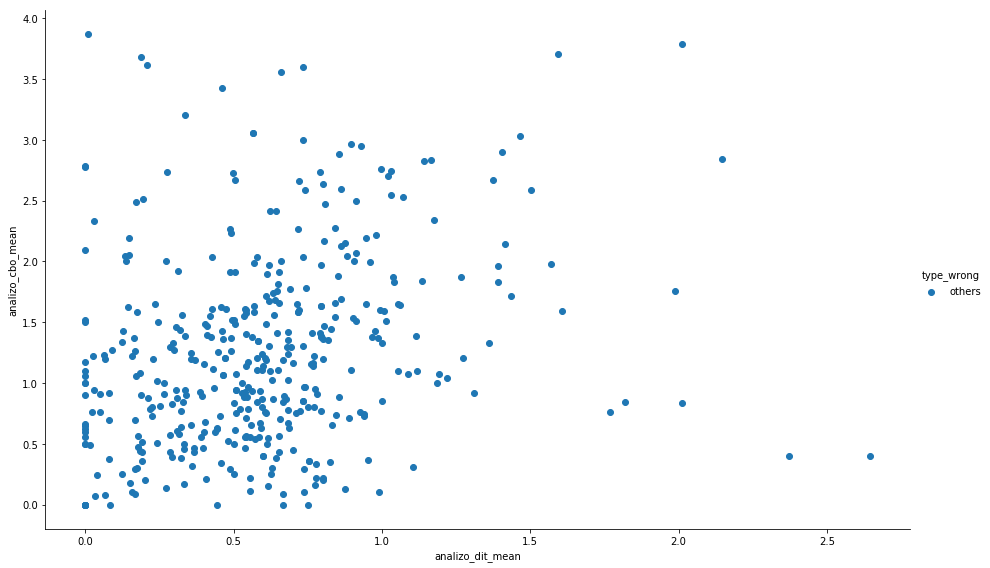

In [235]:
fg = sns.FacetGrid(data=GH_df_reduced_type, hue='type_wrong',  aspect=1.61,height=8)
fg.map(plt.scatter, 'analizo_dit_mean','analizo_cbo_mean',).add_legend()